## Import

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [ ]:
physical_model = "MIST"
path_to_data = "../../../../../../data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = "../../../../../../results/K_fold/"
path_to_predictions = "../../../../../../predictions/K_fold"
tag = "log_g_filtered_smaller_4"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


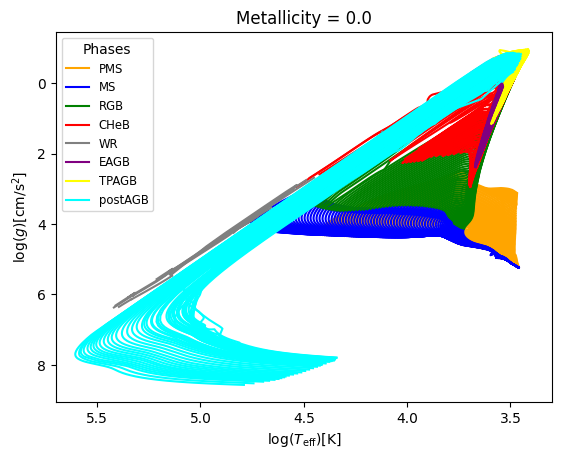

In [3]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [4]:
print_uniques("log_g", iso_df)
# print_uniques_count("log_g", iso_df)

log_g : 1467122 unique values, range [-1.14489780699774, 8.654432637941216]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


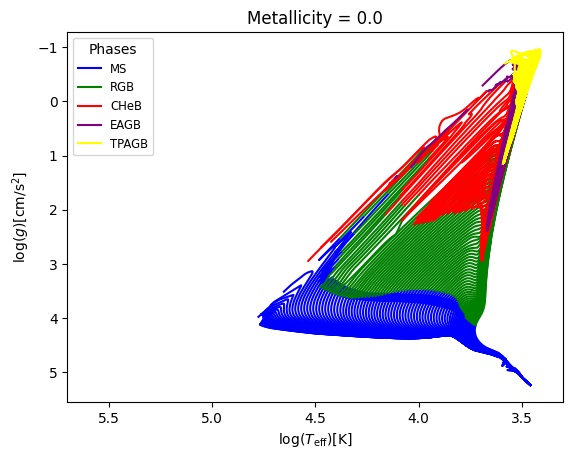

In [5]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [6]:
print_uniques("log_g", phase_filtered_iso_df)
# print_uniques_count("log_g", phase_filtered_iso_df)

log_g : 1140744 unique values, range [-1.14489780699774, 6.259434356871683]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,6.05,4.714227,3.988979,0.0,-0.25,126.426014,1.275476
1,6.05,4.714756,3.984191,0.0,-0.25,129.680424,1.283402
2,6.10,4.702690,3.996793,0.0,-0.25,100.599412,1.221916
3,6.10,4.703675,3.984302,0.0,-0.25,105.905075,1.239336
4,6.10,4.704768,3.968078,0.0,-0.25,113.239048,1.261985
...,...,...,...,...,...,...,...
851749,10.30,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
851750,10.30,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
851751,10.30,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
851752,10.30,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


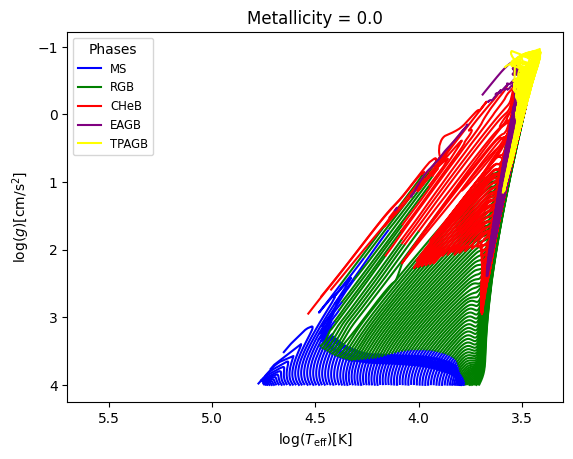

In [7]:
phase_log_g_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], "log_g" : ("<", 4)})
display(phase_log_g_filtered_iso_df)
data_visualiser_phase_age_filtered = Data_visualiser(phase_log_g_filtered_iso_df, physical_model)
data_visualiser_phase_age_filtered.plot_Kiel([], [0.0])

In [9]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_log_g_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.5087345425706472 - 296.5221171165397
Median value in train data for the mass parameter: 2.105973788181932
Mean value in train data for the mass parameter: 7.332771296871136
Range in train data for the radius parameter : 0.1344075688996932 - 3.129269620812593
Median value in train data for the radius parameter: 2.0089967882890374
Mean value in train data for the radius parameter: 1.8206012043605286

Testing set statistics:
Range in test data for the mass parameter : 0.5119675081589914 - 295.22962533274364
Median value in test data for the mass parameter: 2.0982465116764204
Mean value in test data for the mass parameter: 7.279323994169148
Range in test data for the radius parameter : 0.1322827819053272 - 3.1297545143214007
Median value in test data for the radius parameter: 2.010770330530136
Mean value in test data for the radius parameter: 1.8230484626754244

(638815, 4) (212939, 4)
(638815, 2) (212939, 2)


## Model training

### Linear regression

In [ ]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


log_g_filtered_smaller_4 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.41416299184181227
RMSE :  15.506265023718633
MAE :  6.503096929075639
MedAE :  3.2485347064383254
CORR :  0.6435549643636274
MAX_ER :  245.40754105028248
Percentiles : 
  75th percentile :  6.586804166284581
  90th percentile :  15.28605988812269
  95th percentile :  20.6405137917398
  99th percentile :  57.494170904608836



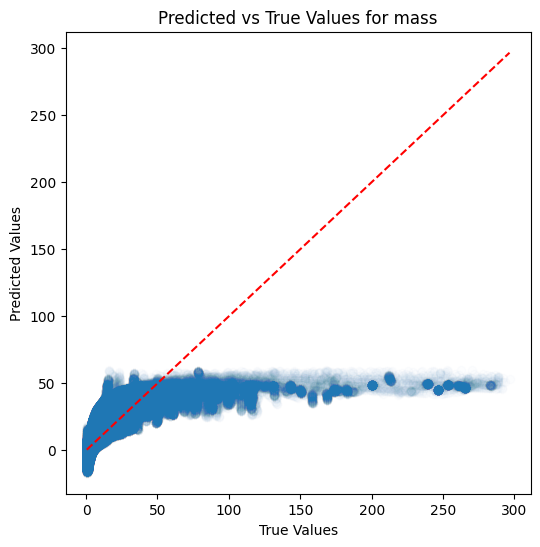

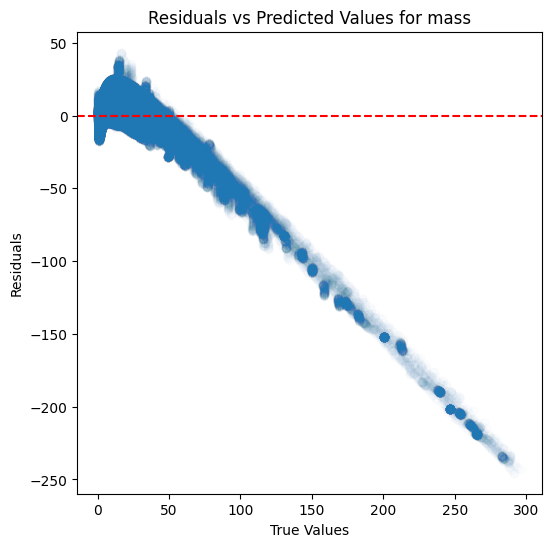

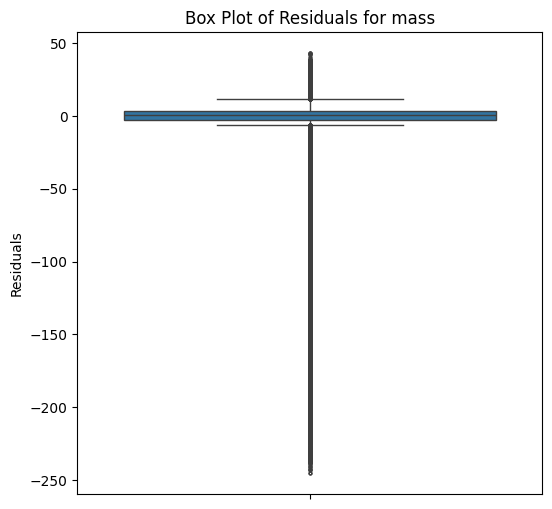

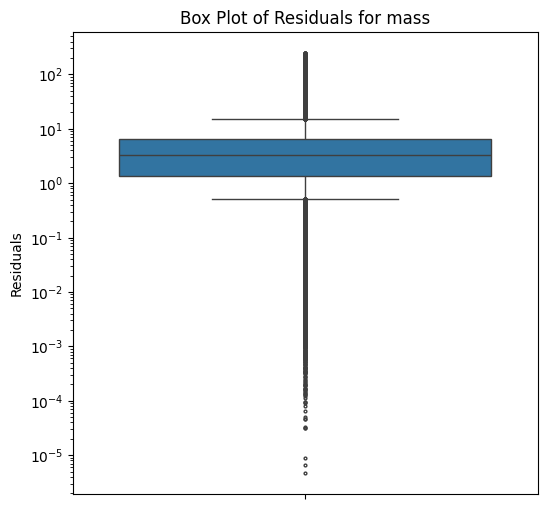

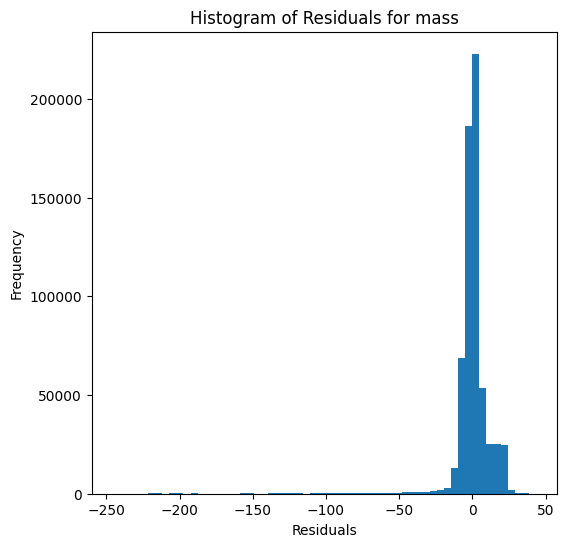

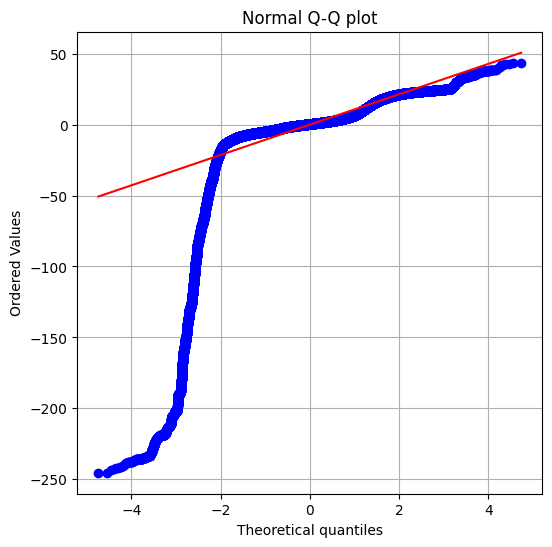


radius results:
RVE :  0.9889191126064973
RMSE :  0.06918299441192666
MAE :  0.046471670689605435
MedAE :  0.03219591300551006
CORR :  0.9944441224154014
MAX_ER :  0.5013446621725519
Percentiles : 
  75th percentile :  0.05873141061966769
  90th percentile :  0.10297214230377279
  95th percentile :  0.14126009353646846
  99th percentile :  0.2650766475983026



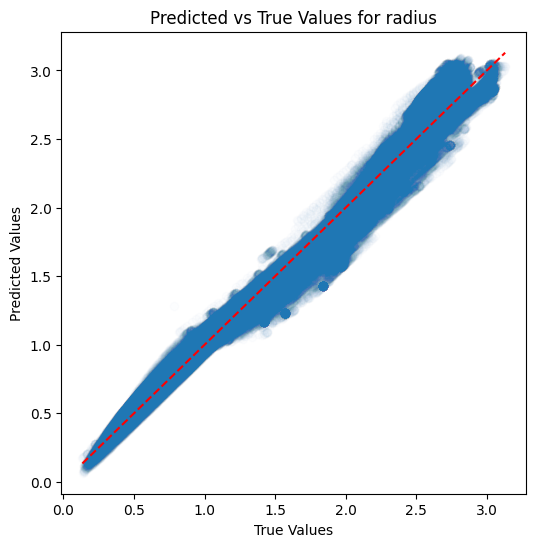

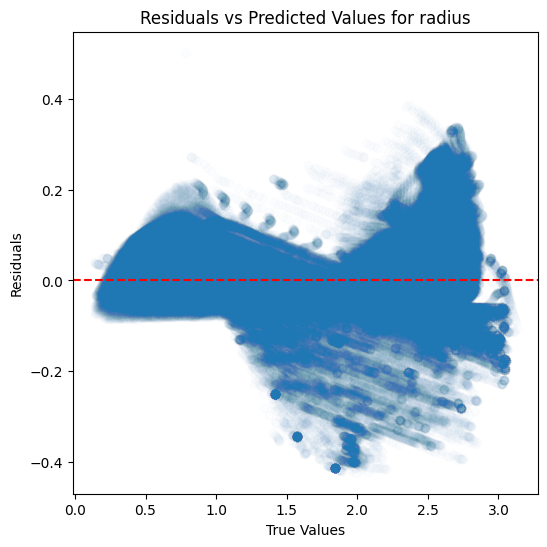

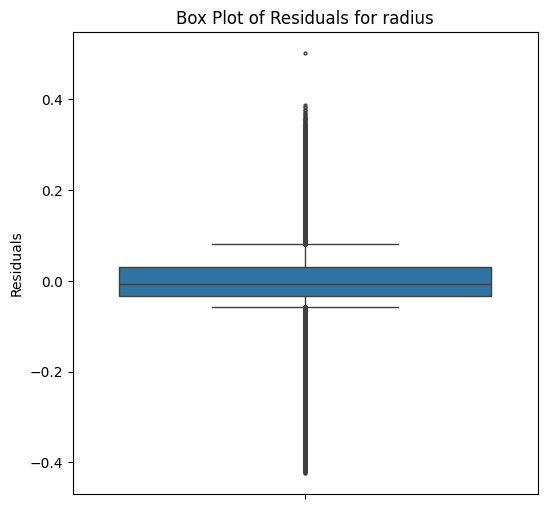

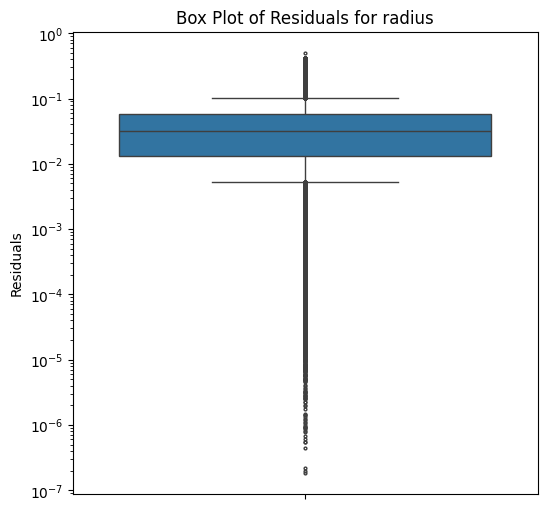

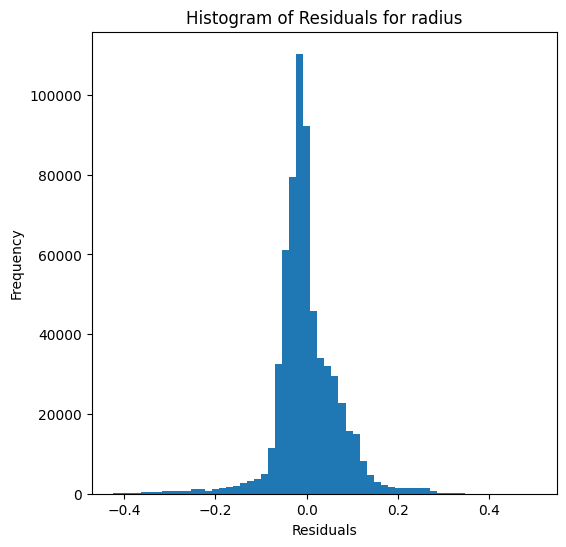

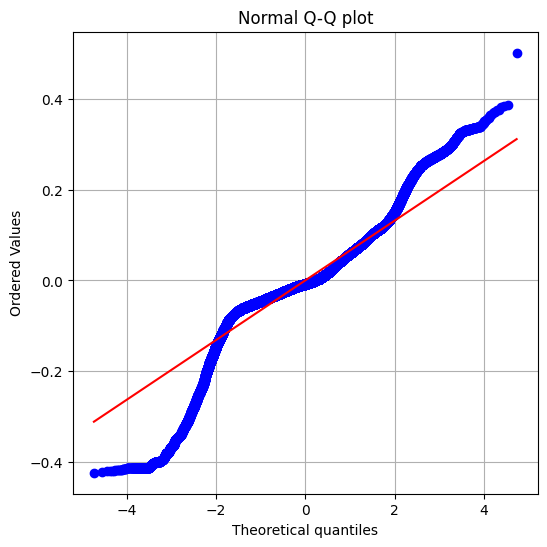

In [ ]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [ ]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


log_g_filtered_smaller_4 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9956958669362931
RMSE :  1.3291156577431298
MAE :  0.11724521818454364
MedAE :  0.005696088106873276
CORR :  0.9978490787241255
MAX_ER :  119.32369616427866
Percentiles : 
  75th percentile :  0.03582337542405267
  90th percentile :  0.13570107172253867
  95th percentile :  0.2556851426395393
  99th percentile :  1.3478840507385002



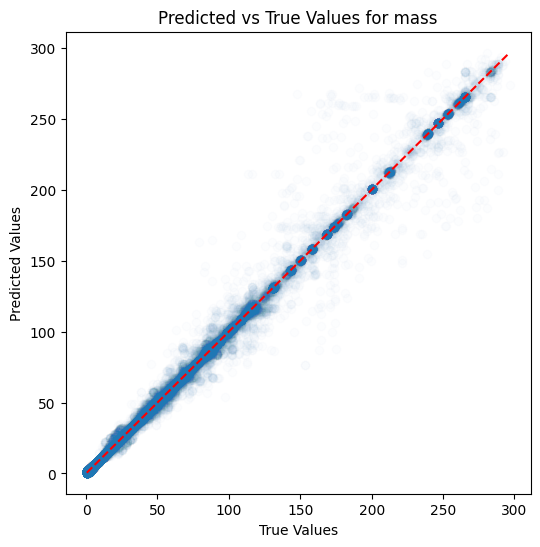

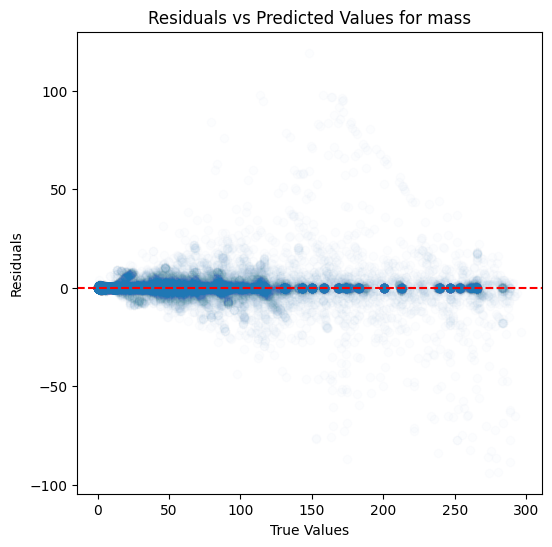

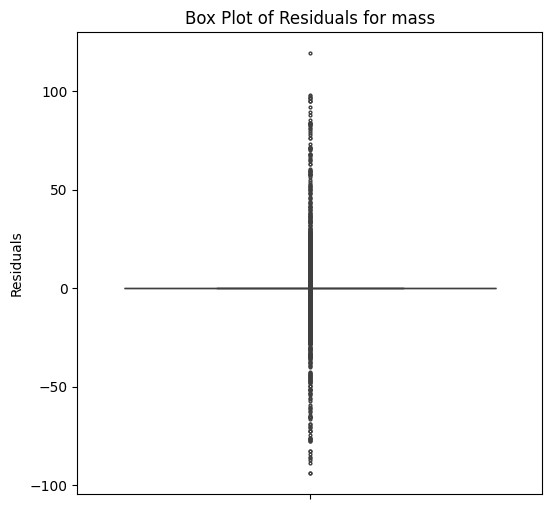

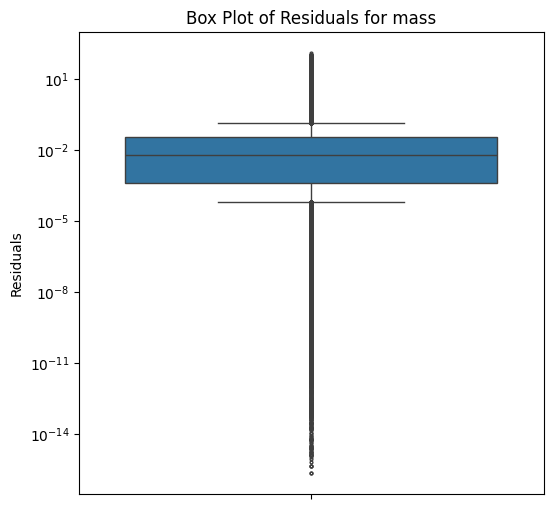

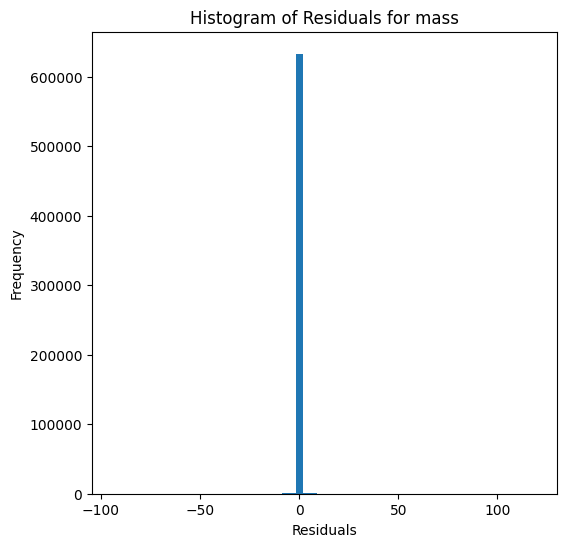

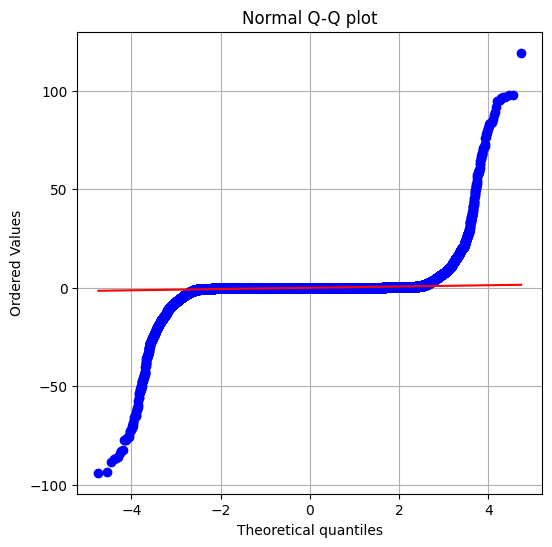


radius results:
RVE :  0.9994516958544845
RMSE :  0.015390147022041887
MAE :  0.008294781769812838
MedAE :  0.004311972649184481
CORR :  0.9997259136136158
MAX_ER :  0.33594601314678707
Percentiles : 
  75th percentile :  0.009580372384585534
  90th percentile :  0.019058095603966763
  95th percentile :  0.0303712591431759
  99th percentile :  0.06677518035357487



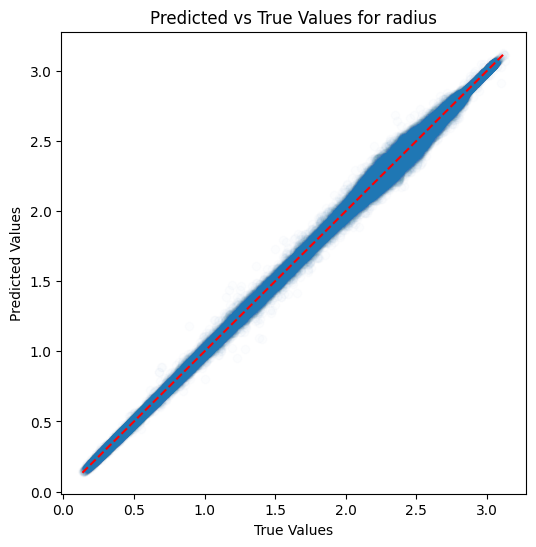

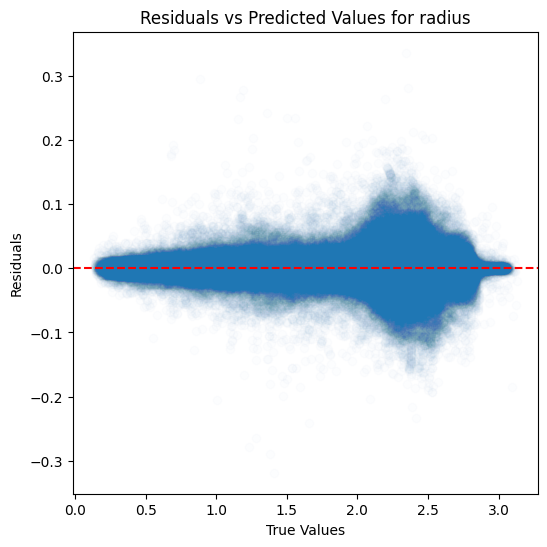

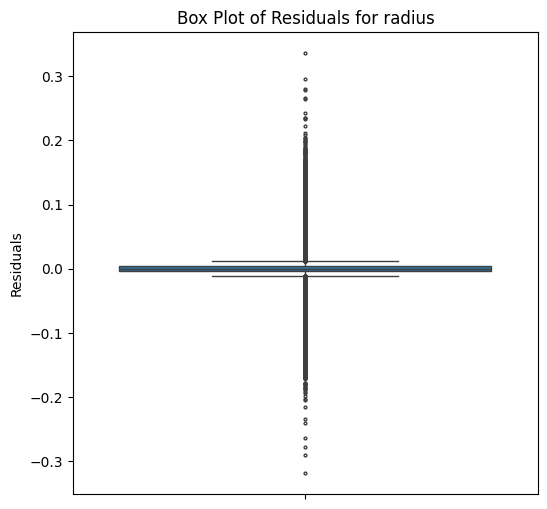

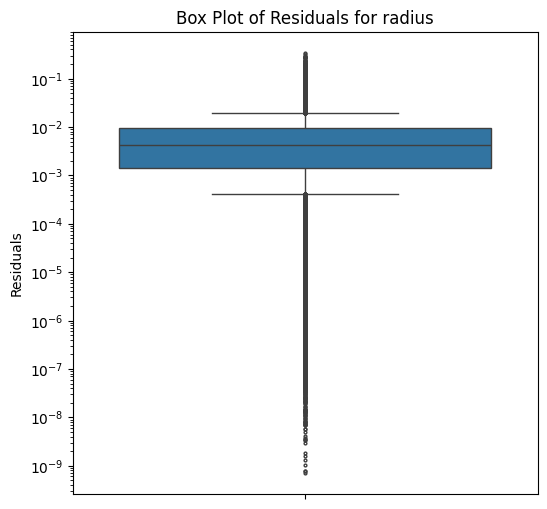

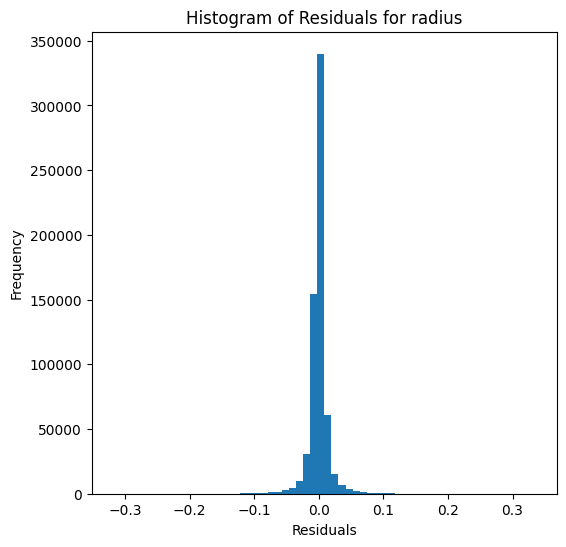

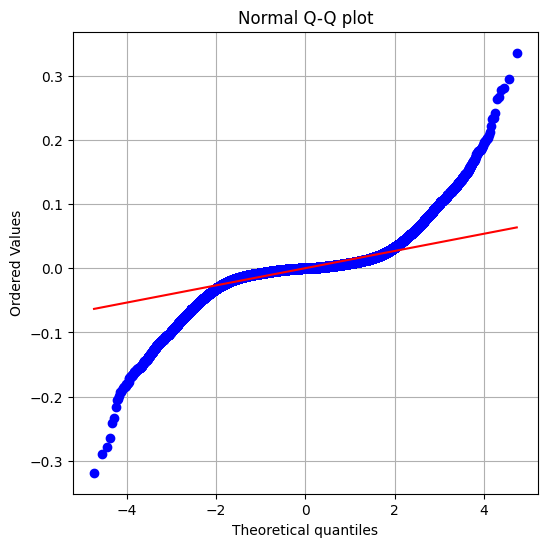

In [ ]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [ ]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


log_g_filtered_smaller_4 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9942848014119788
RMSE :  1.5315631214371026
MAE :  0.16957562201914764
MedAE :  0.01808283565640245
CORR :  0.9971384528367
MAX_ER :  170.3796826118662
Percentiles : 
  75th percentile :  0.07435845256513196
  90th percentile :  0.18729516671098823
  95th percentile :  0.32235840073796274
  99th percentile :  2.566477238687872



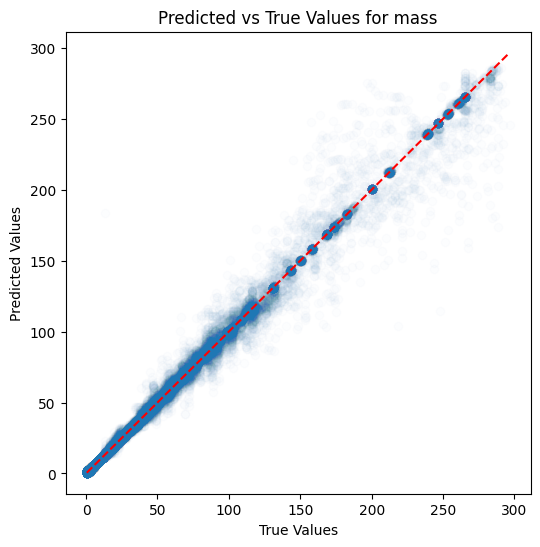

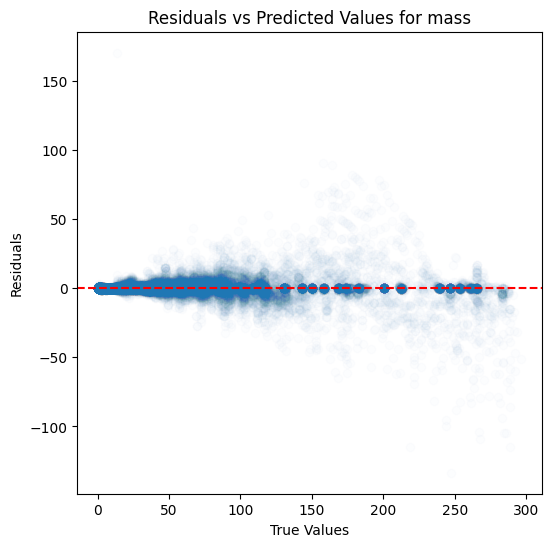

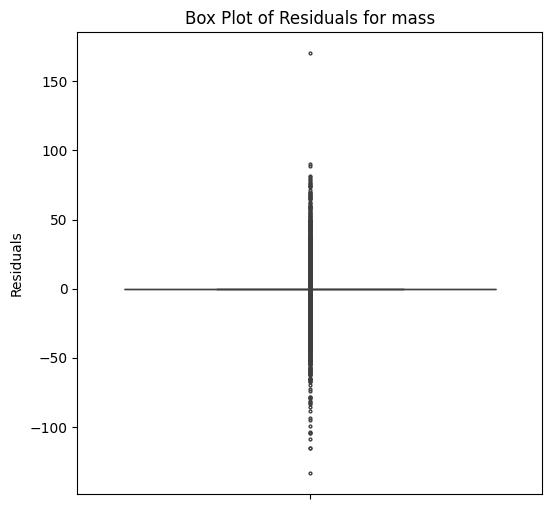

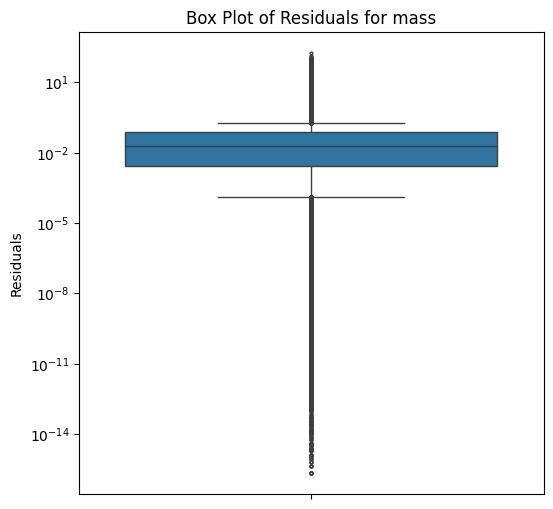

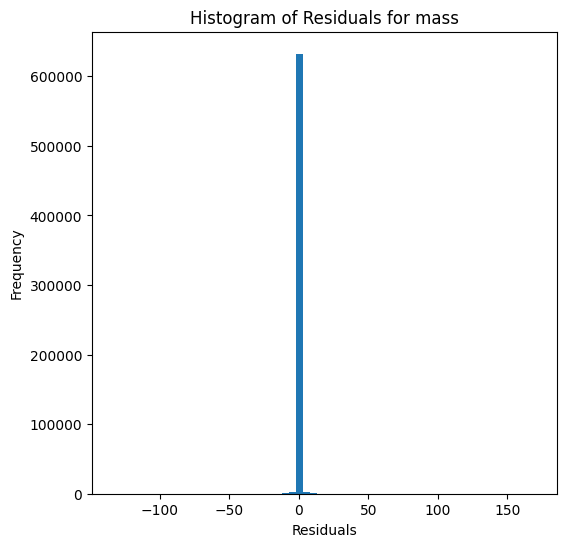

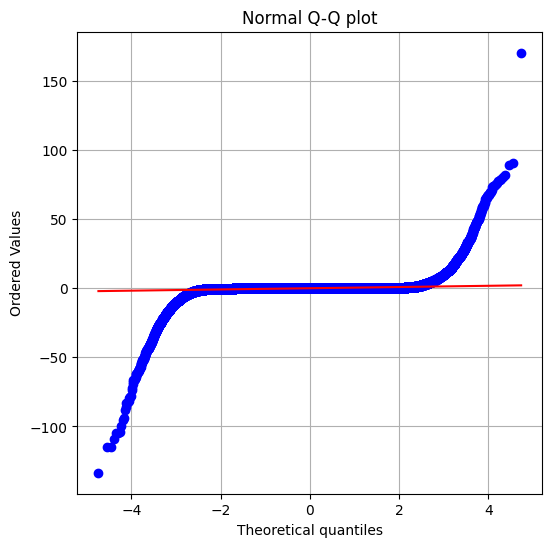


radius results:
RVE :  0.9995800993085868
RMSE :  0.013469876228711831
MAE :  0.007238612954726026
MedAE :  0.003364666770018676
CORR :  0.999790054827766
MAX_ER :  0.5659695572107899
Percentiles : 
  75th percentile :  0.008237183183166075
  90th percentile :  0.01807414799618758
  95th percentile :  0.02851828354747604
  99th percentile :  0.056901881628613975



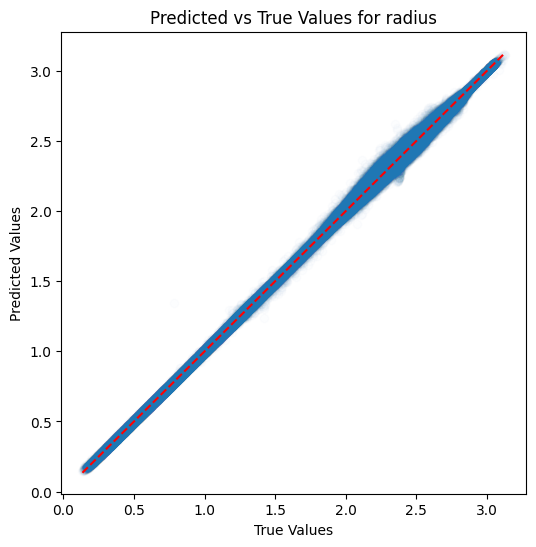

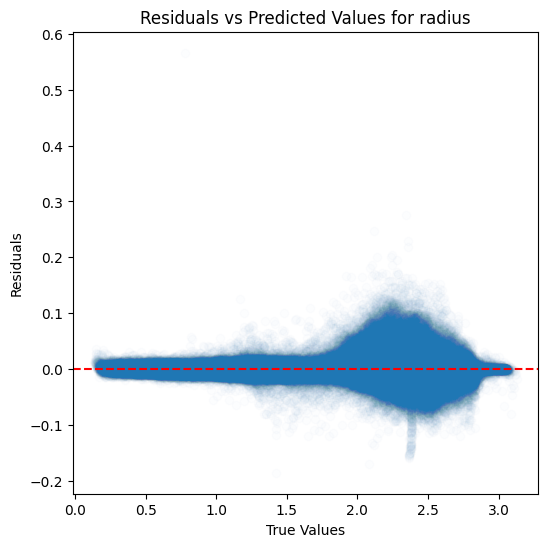

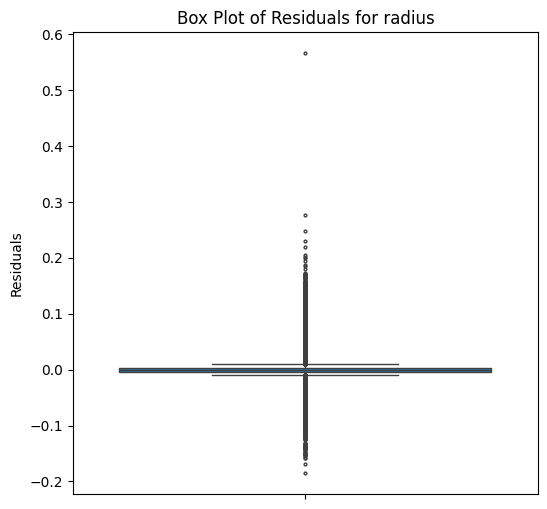

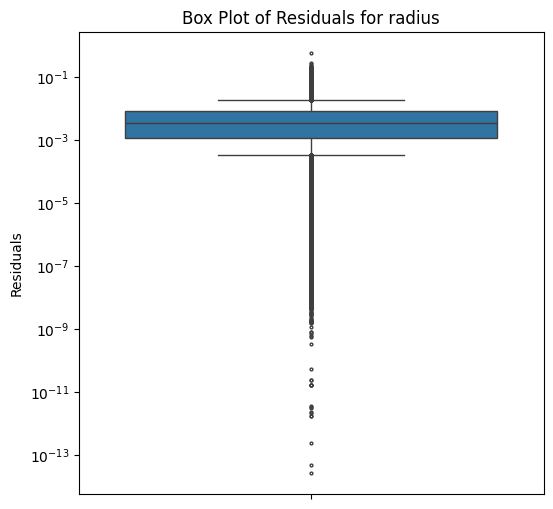

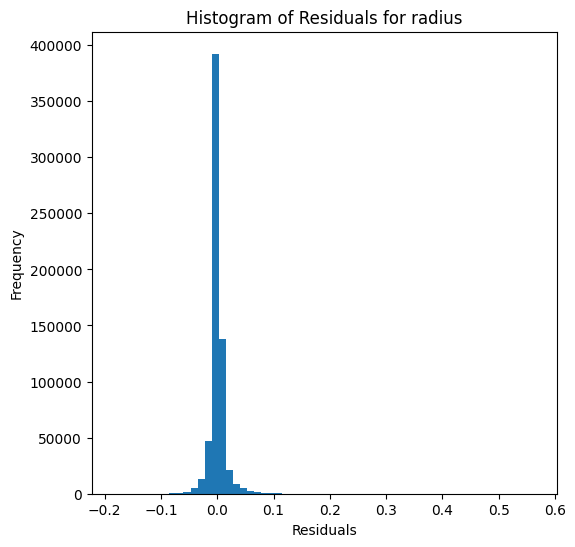

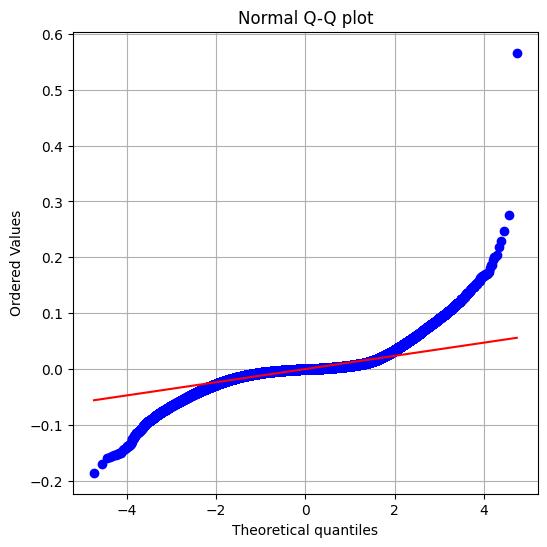

In [ ]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [ ]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


log_g_filtered_smaller_4 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9978451112086745
RMSE :  0.9404488375047583
MAE :  0.10396304930626026
MedAE :  0.011373109518445279
CORR :  0.998921976521123
MAX_ER :  83.41131364433224
Percentiles : 
  75th percentile :  0.04249602407641262
  90th percentile :  0.11941676978706581
  95th percentile :  0.21204196051454516
  99th percentile :  1.5407969665775119



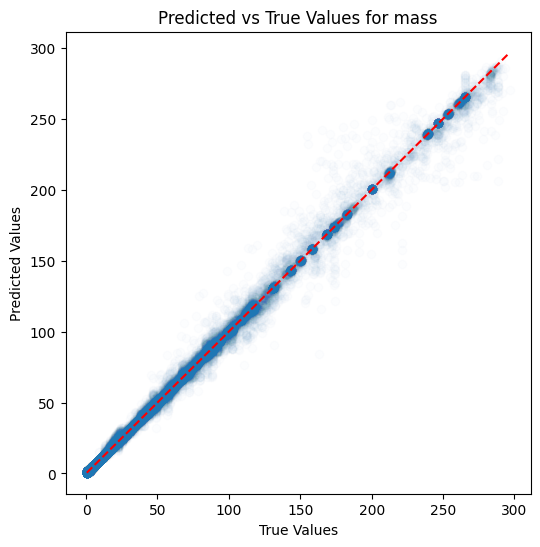

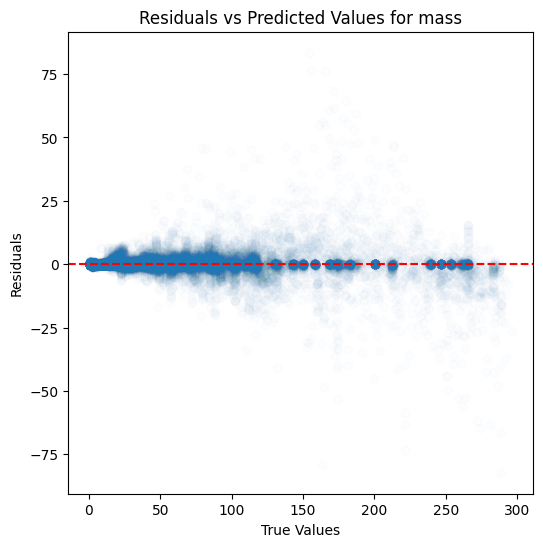

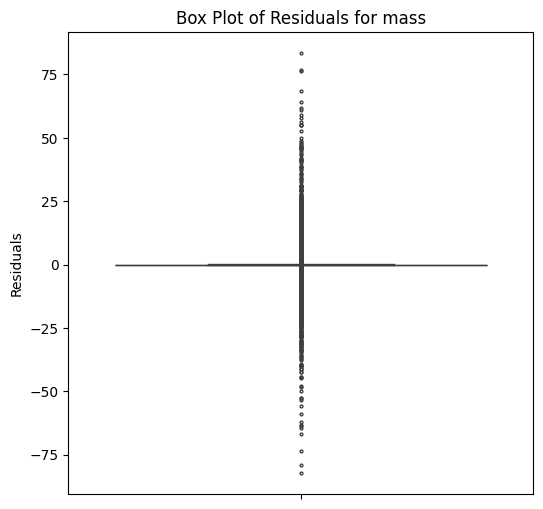

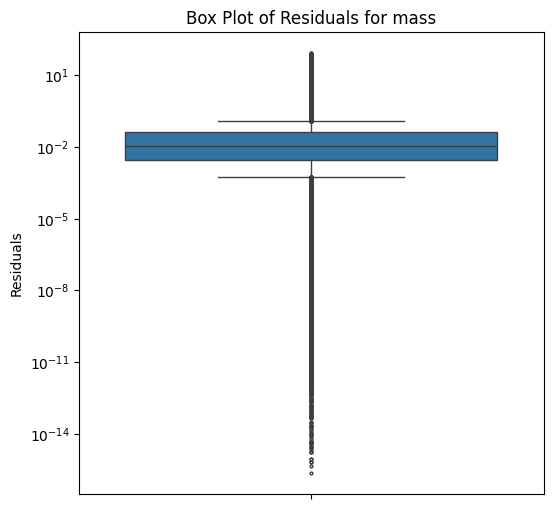

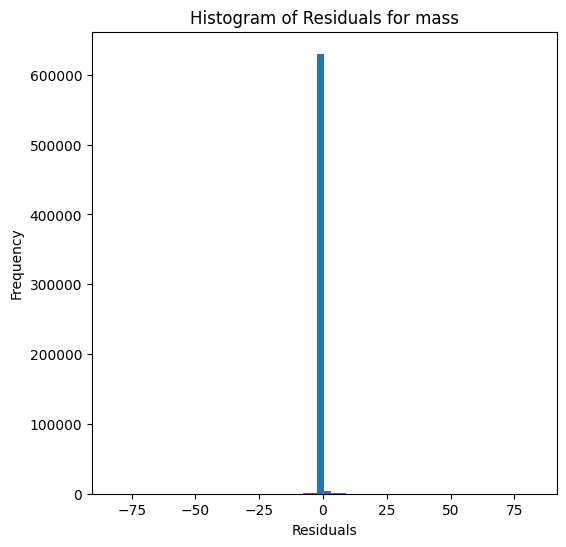

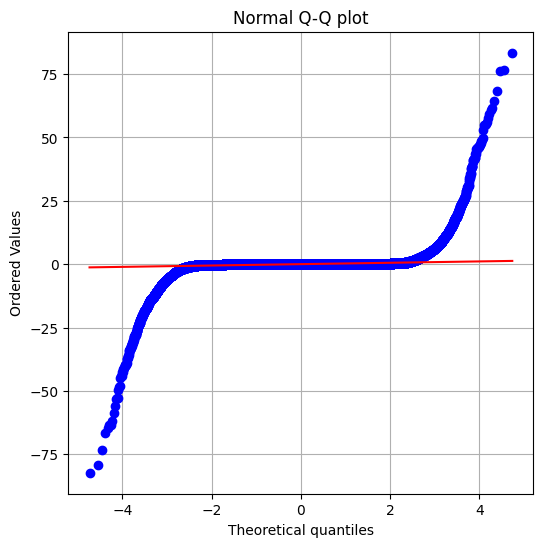


radius results:
RVE :  0.9997426602298136
RMSE :  0.010544323241411798
MAE :  0.005550074782856433
MedAE :  0.0025566527571241338
CORR :  0.999871324761183
MAX_ER :  0.252101628522313
Percentiles : 
  75th percentile :  0.0063922727939522694
  90th percentile :  0.013646029991998708
  95th percentile :  0.0209736531643144
  99th percentile :  0.04490174456994667



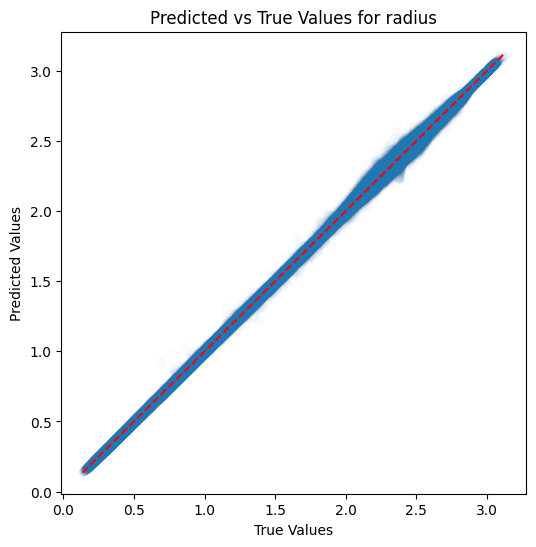

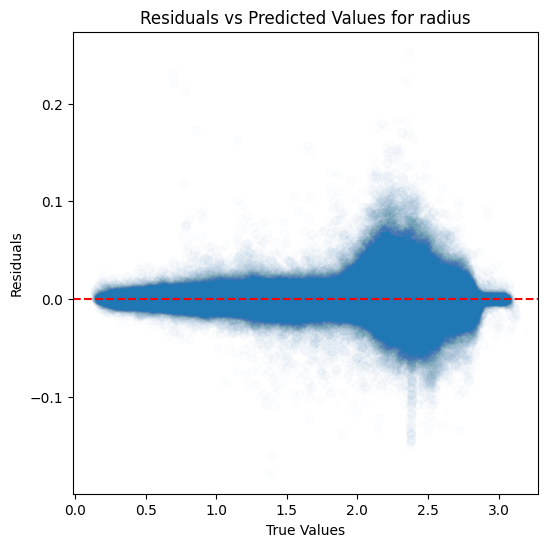

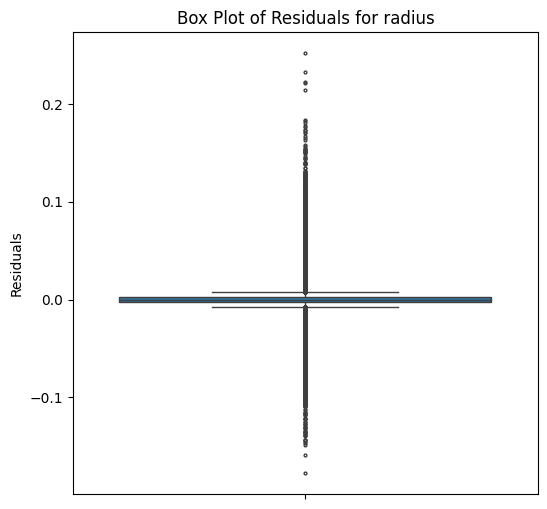

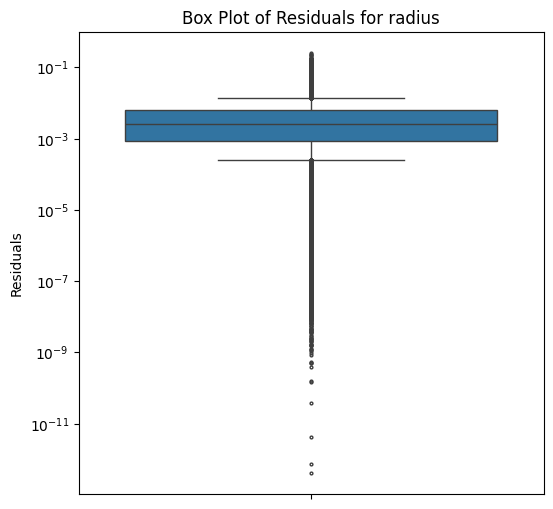

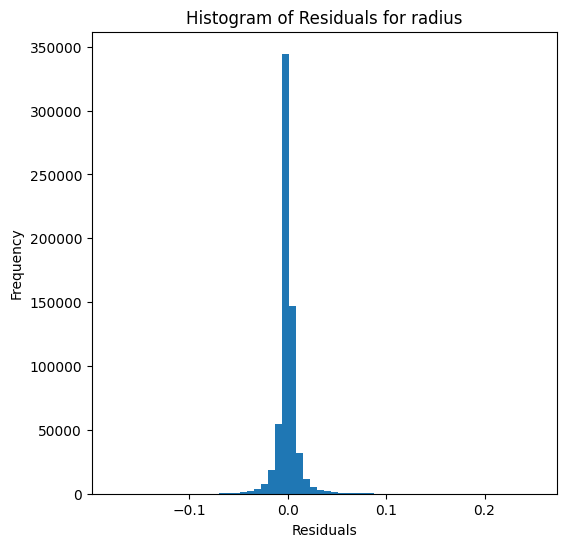

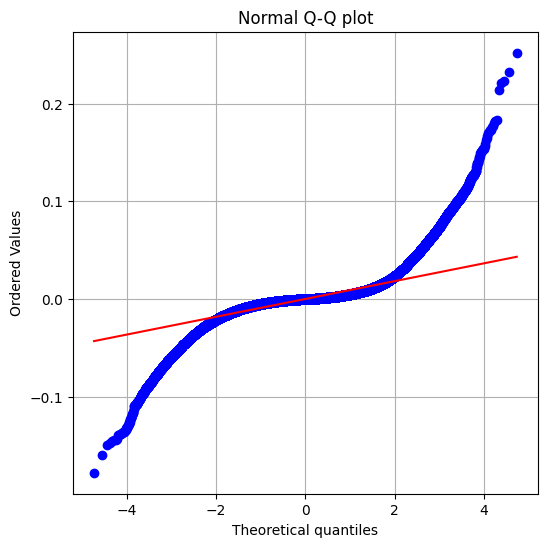

In [ ]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [ ]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


log_g_filtered_smaller_4 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9944759194538912
RMSE :  1.5057358898110489
MAE :  0.269028941916174
MedAE :  0.08228307001399404
CORR :  0.9972341398306089
MAX_ER :  162.34286084004708
Percentiles : 
  75th percentile :  0.18925867928672435
  90th percentile :  0.38147787640129555
  95th percentile :  0.6951366240099635
  99th percentile :  3.6021099041360136



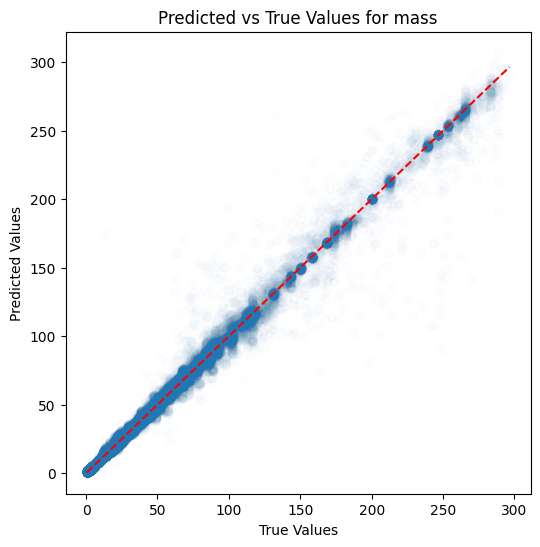

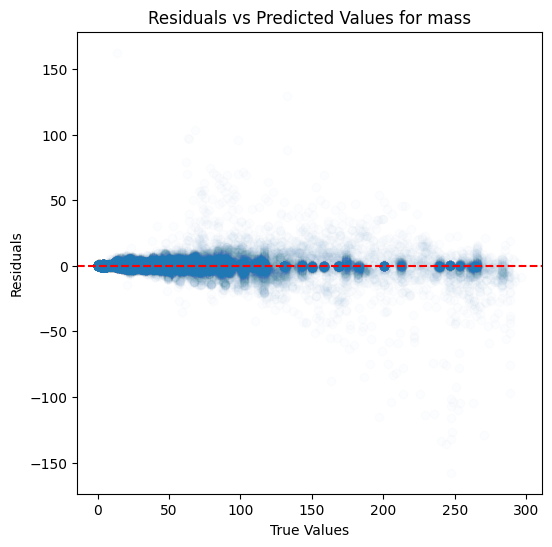

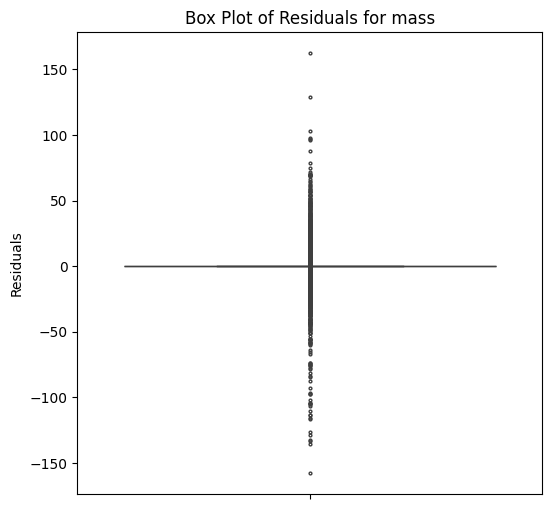

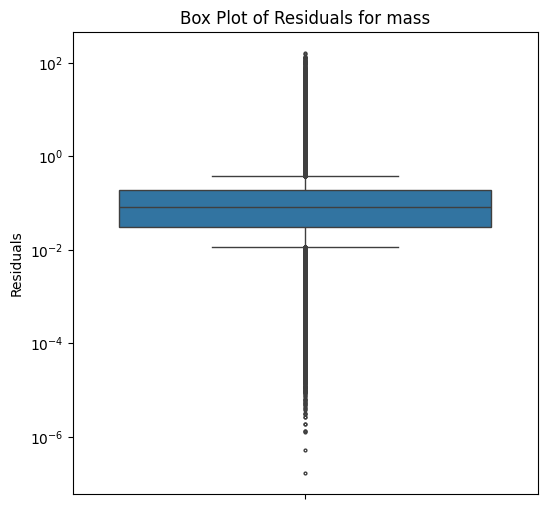

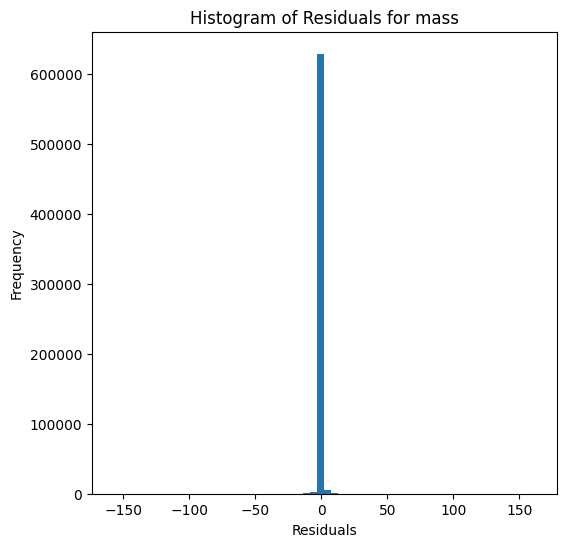

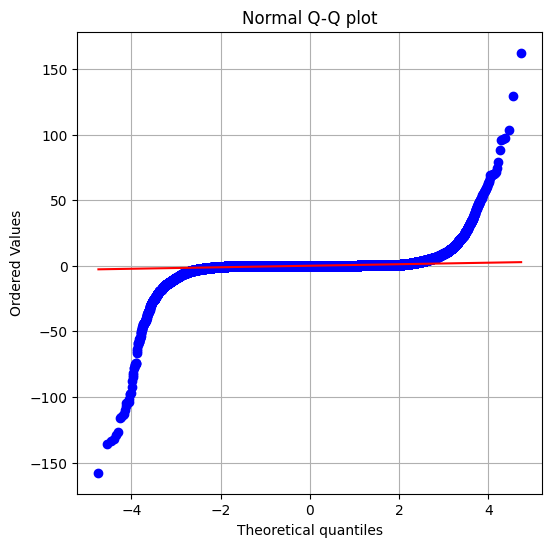


radius results:
RVE :  0.9992332982014706
RMSE :  0.018198073647731794
MAE :  0.013194503217688504
MedAE :  0.009853745661420055
CORR :  0.9996165926694625
MAX_ER :  0.32887565205134917
Percentiles : 
  75th percentile :  0.017896056535636473
  90th percentile :  0.02834059315133368
  95th percentile :  0.036717491314663814
  99th percentile :  0.05964503193786251



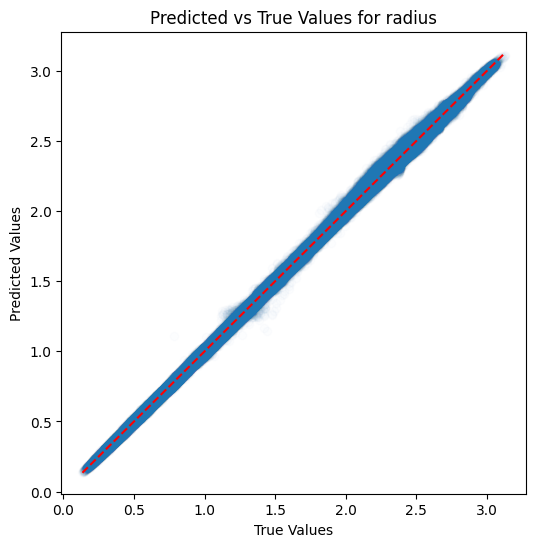

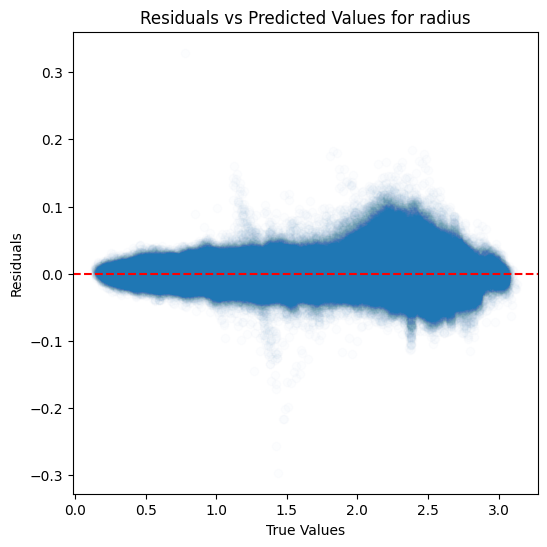

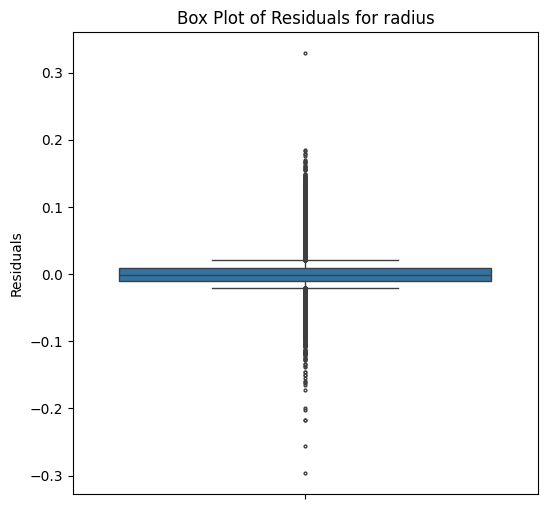

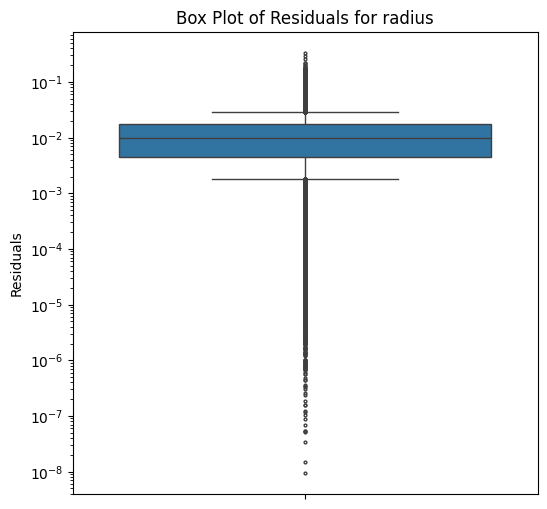

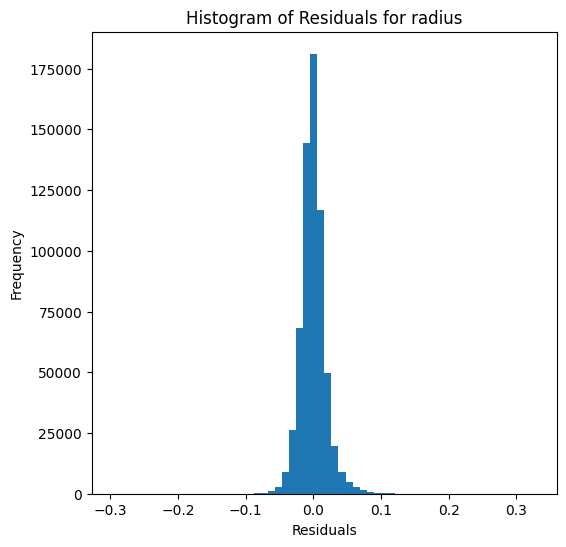

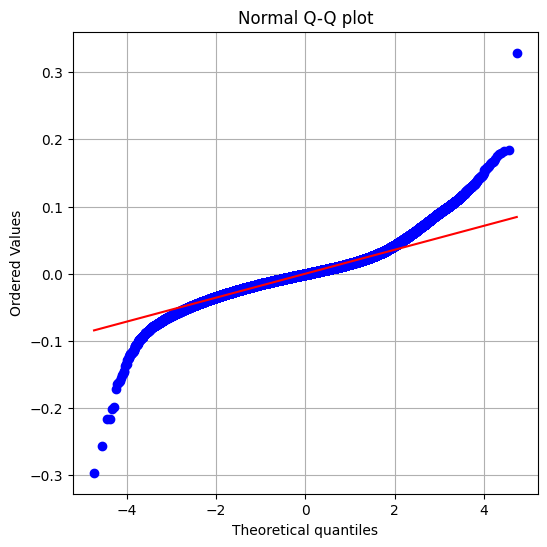

In [ ]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [ ]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


log_g_filtered_smaller_4 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.6726565404151863
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.493801408680304
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.4944546279059676
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.6600407515516646
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.7285143836413295

mass results:
RVE :  0.9817853294070984
RMSE :  2.7471402506477536
MAE :  0.6279551311795349
MedAE :  0.1653611748470345
CORR :  0.9916056296307798
MAX_ER :  168.1731123481038
Percentiles : 
  75th percentile :  0.32359047009142206
  90th percentile :  0.700170414189334
  95th percentile :  1.980342667006404
  99th percentile :  10.728189973091384



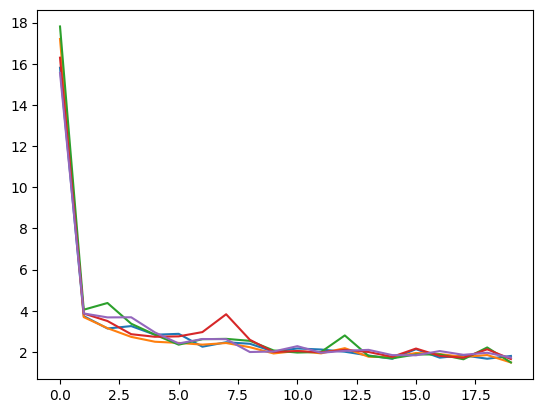

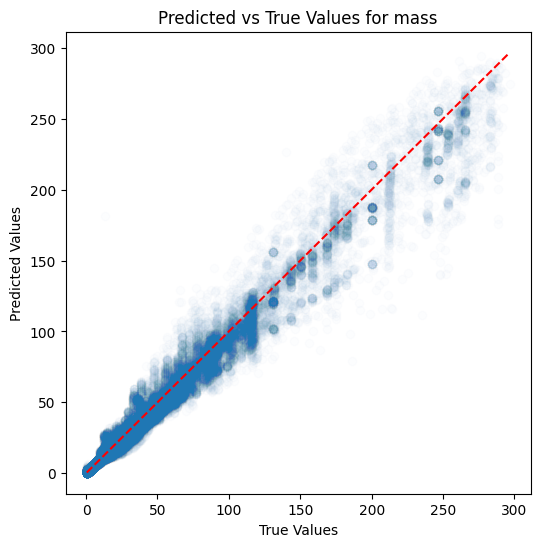

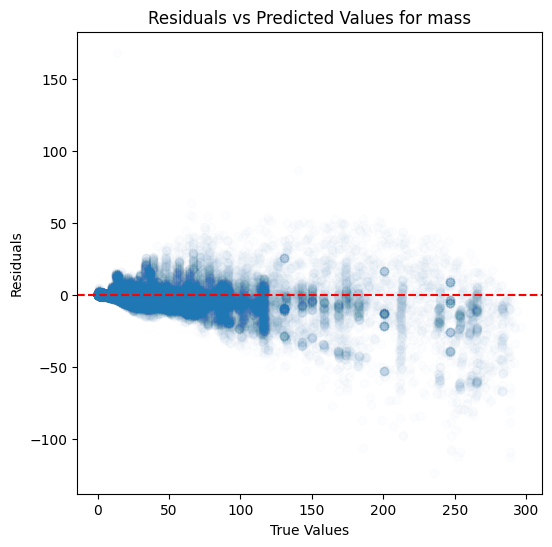

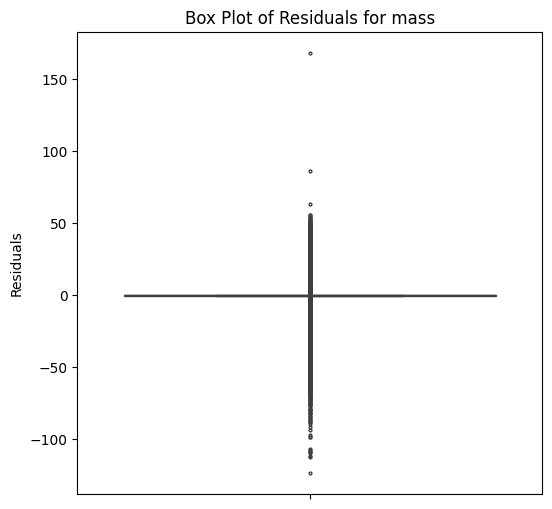

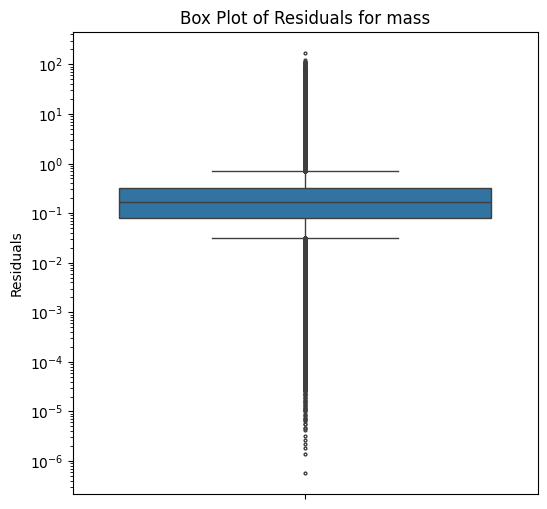

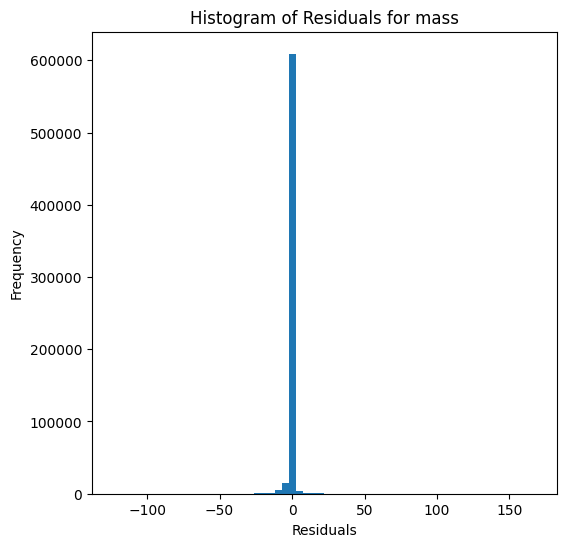

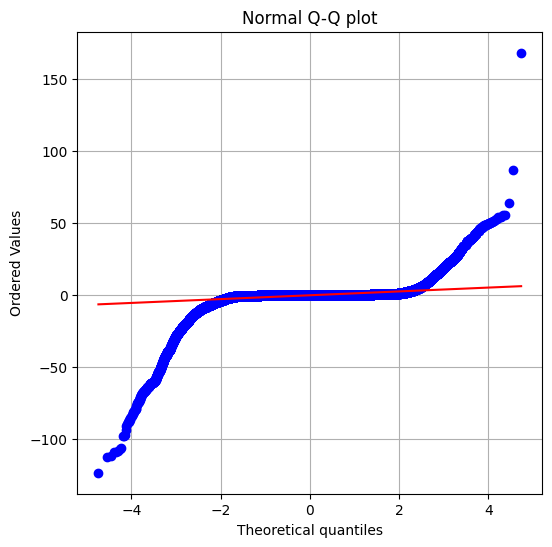


radius results:
RVE :  0.9904228632336354
RMSE :  0.0643943485949012
MAE :  0.047405160535846314
MedAE :  0.036841929392053
CORR :  0.9952475962413017
MAX_ER :  1.0028487439712273
Percentiles : 
  75th percentile :  0.06564638456552985
  90th percentile :  0.09973435846280135
  95th percentile :  0.12921516961343843
  99th percentile :  0.192294031467586



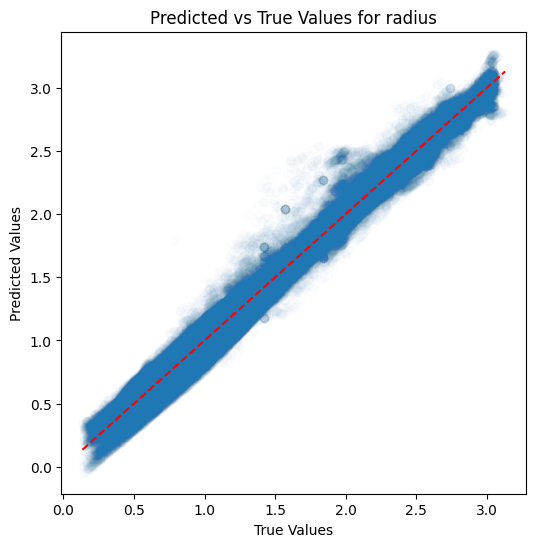

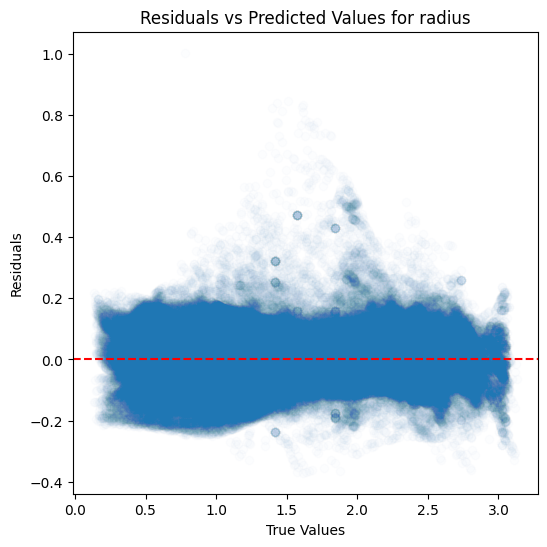

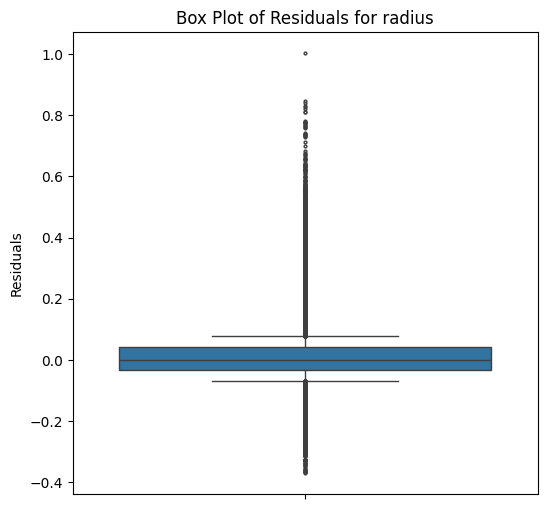

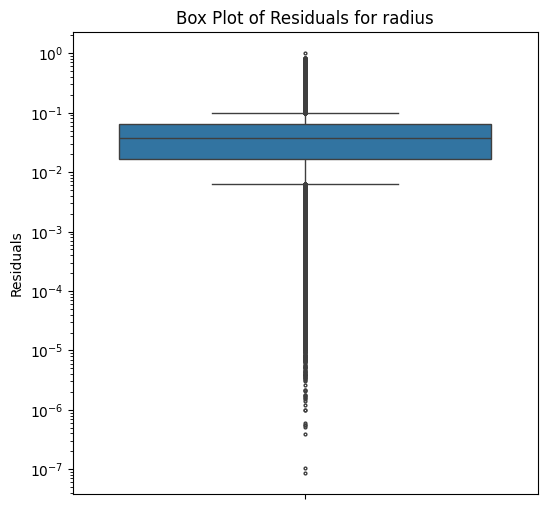

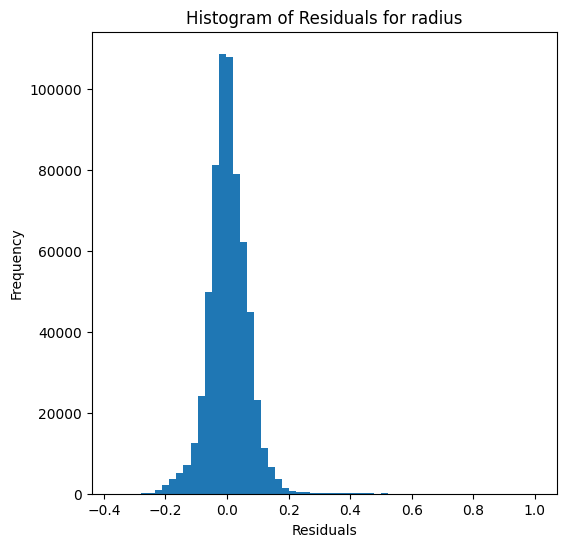

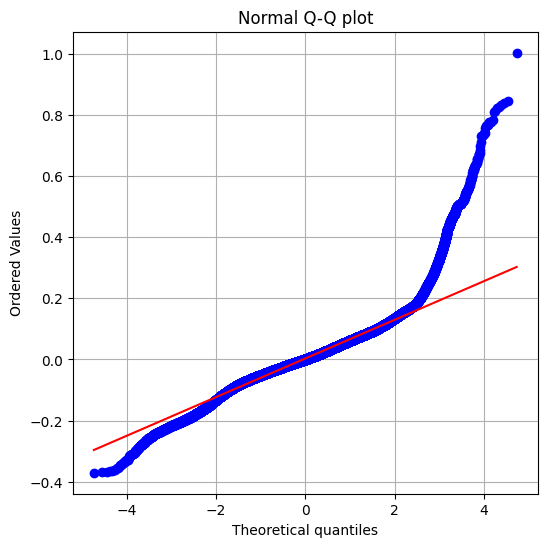

In [11]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)